In [102]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Question 1: Radon Transform

In [103]:
def radon_transform(img, theta, r):
    h, w = img.shape
    diag = int((np.sqrt(h**2 + w**2)))

    rot = np.linspace(0, r, theta)
    out = np.zeros((diag, theta))
    
    for i, angle in enumerate(rot):

        rotation_matrix = cv2.getRotationMatrix2D((w // 2, h // 2), angle, 1.0)
        rotated_img = cv2.warpAffine(img, rotation_matrix, (w, h), flags=cv2.INTER_LINEAR)

        projection = np.sum(rotated_img,axis=0)
        out[:, i] = np.pad(projection, (0, diag - len(projection)))
    
    return out

(-0.5, 179.5, 483.5, -0.5)

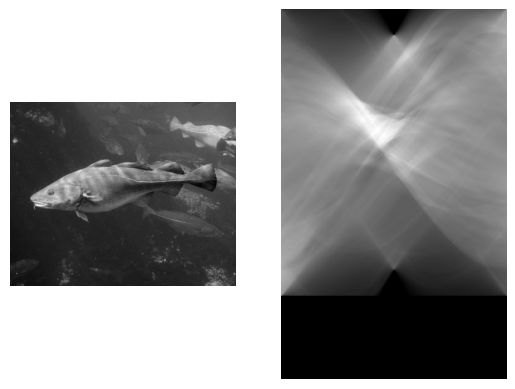

In [108]:
img = cv2.imread('fish.bmp', cv2.IMREAD_GRAYSCALE)
out = radon_transform(img, 180, 180)

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(out, cmap='gray', aspect='auto')
plt.axis('off')

### Varying step size of theta

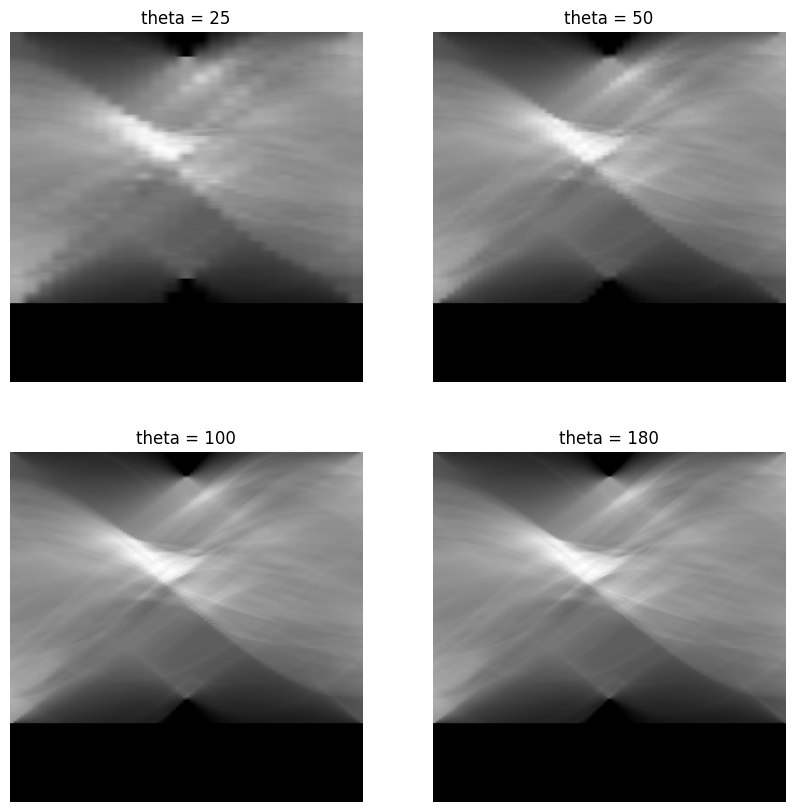

In [105]:
theta = [25, 50, 100, 180]

plt.figure(figsize=(10, 10))

for i, t in enumerate(theta):
    out = radon_transform(img, t, 180)
    plt.subplot(2, 2, i+1)
    plt.imshow(out, cmap='gray',aspect = "auto")
    plt.title('theta = {}'.format(t))
    plt.axis('off')

### Varying number of detectors


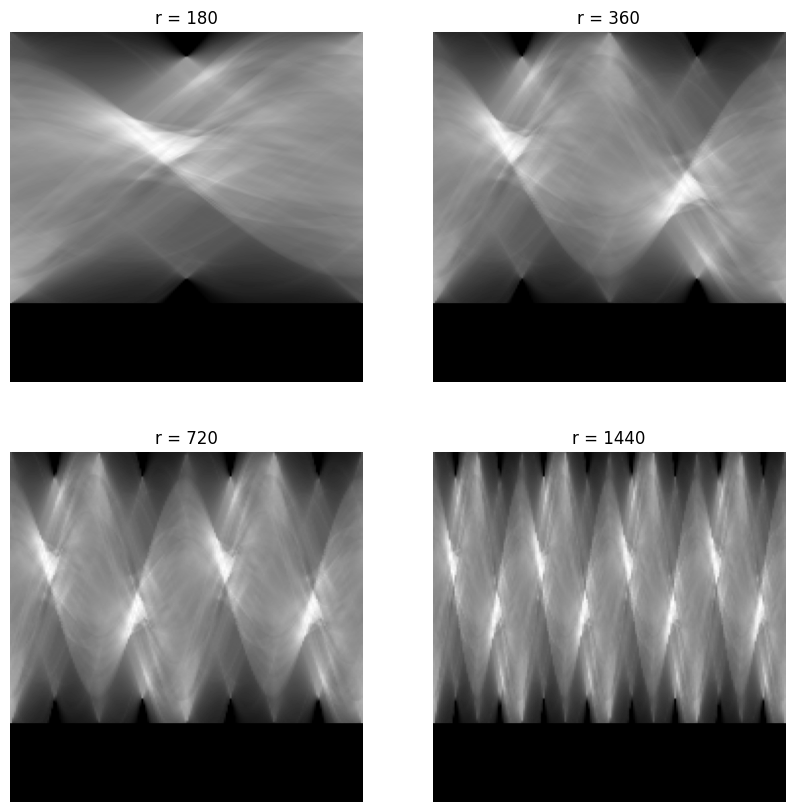

In [106]:
r = [180, 360, 720, 1440]

plt.figure(figsize=(10, 10))

for i, t in enumerate(r):
    out = radon_transform(img, 180, t)
    plt.subplot(2, 2, i+1)
    plt.imshow(out, cmap='gray',aspect = "auto")
    plt.title('r = {}'.format(t))
    plt.axis('off')

* From the above images we can see that the sinogram becomes sharper for larger values of step size theta.
* Similarly as we increase the number of detectors, the sinogram captures more information about the image.